# Healthcare analysis by country
---

Group Name

Team members:
- Husain Radhi
- Hussain Darwish

## Introduction 
__Introduction to the topic__ 

The healthcare and welfare widely varies based on country. We were tasked by the World Health Organization to find out which countries are in most need of healthcare based on databases they provided which include population, life expectency and Gross National Income per capita. Our job is to clean, transform, analyze and visualize the databases to find those countries.

---

## Problem Statement

The quality of healthcare is unevenly distributed across the world, and many countries struggle to provide adequate care for their populations. By analyzing population size, GNI per capita, and life expectancy data, this project aims to identify the countries in most need of healthcare support. We will be using python and its libraries to explore, clean, transform, analyze and finally visualize the data.

## Objectives:
__Questions that will guide the analysis to solve the problem__
1) Which countries have low life expectency?
2) Which countries have low GNI per capita?
3) Which countries have high population, low GNI per capita and low life expectency (the top countries needing immediate healthcare support)?
4) How can we analyze and visualize the countries which need healthcare support?

---

## Exploratory Data Analysis (EDA):

### Data Info:
__Getting the data and exploring it__

In [1]:
import pandas as pd #importing required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format) #Changing the fomrat of numbers to be cleaner

In [3]:
p_df= pd.read_csv("population.csv") #Importing the databases and converting them to pandas dataframes
le_df=pd.read_csv("life_expectancy.csv")
gni_df= pd.read_csv("gni_per_cap_atlas_method_con2021.csv")

#### Let's find out the types of the values in the dataframe

In [4]:
p_df.dtypes 

country    object
1800       object
1801       object
1802       object
1803       object
            ...  
2096       object
2097       object
2098       object
2099       object
2100       object
Length: 302, dtype: object

In [5]:
le_df.dtypes 

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2096       float64
2097       float64
2098       float64
2099       float64
2100       float64
Length: 302, dtype: object

In [6]:
gni_df.dtypes 

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2046        object
2047        object
2048        object
2049        object
2050        object
Length: 252, dtype: object

#### Let's explore the population database first

In [7]:
p_df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.2k,47.2k,...,432k,434k,435k,436k,437k,438k,439k,440k,441k,441k
193,Yemen,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,...,73.2M,73.3M,73.5M,73.6M,73.7M,73.8M,73.9M,74M,74.1M,74.2M
194,South Africa,1.45M,1.45M,1.46M,1.46M,1.47M,1.47M,1.48M,1.49M,1.49M,...,75.6M,75.5M,75.4M,75.3M,75.2M,75.1M,75M,74.8M,74.7M,74.6M
195,Zambia,747k,758k,770k,782k,794k,806k,818k,831k,843k,...,60.3M,60.7M,61.1M,61.5M,61.9M,62.2M,62.6M,62.9M,63.3M,63.6M


In [8]:
p_df.describe() #The describe is a mess as there are numbers with strings (letters) like the "k", "M" and so on

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,197,197,197,197,197,197,197,197,197,197,...,196,196,196,196,196,196,196,196,196,196
unique,197,164,183,186,185,179,185,180,181,180,...,190,195,186,190,190,185,187,187,182,189
top,Afghanistan,2.5M,2M,1.01M,2.01M,2.02M,2.02M,2.03M,2.03M,2.04M,...,108M,108M,109M,109M,6.61M,1.68M,110M,17M,13.2M,87.1M
freq,1,6,4,3,3,4,4,3,3,5,...,2,2,2,2,3,3,2,3,3,2


In [9]:
p_df.set_index("country", inplace=True) #setting the country as the index to simplify things

In [10]:
p_df #viewing the dataframe with the country as the index

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,416k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.2k,47.2k,47.2k,...,432k,434k,435k,436k,437k,438k,439k,440k,441k,441k
Yemen,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,...,73.2M,73.3M,73.5M,73.6M,73.7M,73.8M,73.9M,74M,74.1M,74.2M
South Africa,1.45M,1.45M,1.46M,1.46M,1.47M,1.47M,1.48M,1.49M,1.49M,1.5M,...,75.6M,75.5M,75.4M,75.3M,75.2M,75.1M,75M,74.8M,74.7M,74.6M


In [11]:
p_df.isnull().values.any() #finding out if there are null values

np.True_

In [12]:
p_df.isnull().sum() #checking the columns with nulls

1800    0
1801    0
1802    0
1803    0
1804    0
       ..
2096    1
2097    1
2098    1
2099    1
2100    1
Length: 301, dtype: int64

In [13]:
p_df.isnull().sum().sum() #summing all null values

np.int64(100)

In [14]:
p_df[p_df.isnull().any(axis=1)] #filtering the rows with null values

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Holy See,905,905,905,905,905,905,905,905,905,905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
p_df.drop("Holy See", inplace=True) #dropping Holy See country (row) as it has null values
display(p_df)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,416k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.2k,47.2k,47.2k,...,432k,434k,435k,436k,437k,438k,439k,440k,441k,441k
Yemen,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,...,73.2M,73.3M,73.5M,73.6M,73.7M,73.8M,73.9M,74M,74.1M,74.2M
South Africa,1.45M,1.45M,1.46M,1.46M,1.47M,1.47M,1.48M,1.49M,1.49M,1.5M,...,75.6M,75.5M,75.4M,75.3M,75.2M,75.1M,75M,74.8M,74.7M,74.6M


In [16]:
p_df.isnull().sum().sum() #checking if there are nulls again by summing all of them

np.int64(0)

#### We need to create a function that replaces the letters with numerics and multiply them

In [17]:
def conv(num):
    ''' Creating a function that replaces "M", "k", and "B" symbols with an empty string then multiplies the remaining number in the cell with the
    corresponding symbol value (k = 1000 for e.g.)'''
    x=0
    if 'M' in num:
        x=float(num.replace('M',''))*1000000
    elif 'k' in num:
        x=float(num.replace('k',''))*1000
    elif 'B' in num:
        x=float(num.replace('B',''))*1000000000
    else:
        x=float(num)
    return x

In [18]:
for name in p_df: #loop to apply the function to each value by column, it also prints column name to see if there are errors
    print(name)
    p_df[name] = p_df[name].apply(conv)

1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


#### We are going to focus on the past 6 years (2020 to 2025) for statistics and analysis

In [19]:
p_df.loc[:,"2020":"2025"].describe() #Some statistics for the past 6 years

,2020,2021,2022,2023,2024,2025
count,196.00,196.00,196.00,196.00,196.00,196.00
mean,39934405.61,40329113.78,40677628.57,41014178.57,41388330.61,41691038.78
std,147269960.72,148338901.63,148941689.51,149539754.57,150163442.04,150309584.99
min,11100.00,11200.00,11300.00,11400.00,11500.00,11600.00
25%,2117500.00,2115000.00,2117500.00,2142500.00,2180000.00,2210000.00
50%,8835000.00,8910000.00,8990000.00,9110000.00,9285000.00,9430000.00
75%,28700000.00,29175000.00,29825000.00,30450000.00,31125000.00,31650000.00
max,1420000000.00,1430000000.00,1430000000.00,1430000000.00,1440000000.00,1450000000.00


In [20]:
p_df.loc[:,"2020":"2025"].sort_values(by="2025", ascending=False) #Sorting by 2025 as it is the most recent in descending order

,2020,2021,2022,2023,2024,2025
country,,,,,,
India,1400000000.00,1410000000.00,1420000000.00,1430000000.00,1440000000.00,1450000000.00
China,1420000000.00,1430000000.00,1430000000.00,1430000000.00,1430000000.00,1420000000.00
United States,336000000.00,337000000.00,338000000.00,340000000.00,342000000.00,344000000.00
Indonesia,272000000.00,274000000.00,276000000.00,278000000.00,280000000.00,282000000.00
Pakistan,227000000.00,231000000.00,236000000.00,240000000.00,245000000.00,250000000.00
...,...,...,...,...,...,...
Monaco,36900.00,36700.00,36500.00,36300.00,36200.00,36100.00
San Marino,34000.00,33700.00,33700.00,33600.00,33600.00,33600.00
Palau,18000.00,18000.00,18100.00,18100.00,18100.00,18000.00


#### We repeat similar steps for the GNI per capita database

In [21]:
gni_df.dtypes #We have float values and object values

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2046        object
2047        object
2048        object
2049        object
2050        object
Length: 252, dtype: object

In [22]:
gni_df.set_index("country", inplace=True)

In [23]:
gni_df[gni_df.isnull().any(axis=1)] #We try to find out the rows with missing values

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
country,,,,,,,,,,,,,,,,,,,,,
Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
gni_df.drop("Liechtenstein",inplace=True) #We drop that row

In [25]:
display(gni_df)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,207.00,207.00,207.00,207.00,207.00,207.00,207.00,207.00,207.00,207.00,...,751,767,783,800,817,834,852,870,888,907
Angola,517.00,519.00,522.00,524.00,525.00,528.00,531.00,533.00,536.00,537.00,...,2770,2830,2890,2950,3010,3080,3140,3210,3280,3340
Albania,207.00,207.00,207.00,207.00,207.00,207.00,207.00,207.00,207.00,207.00,...,9610,9820,10k,10.2k,10.5k,10.7k,10.9k,11.1k,11.4k,11.6k
United Arab Emirates,738.00,740.00,743.00,746.00,749.00,751.00,754.00,757.00,760.00,763.00,...,47.9k,48.9k,50k,51k,52.1k,53.2k,54.3k,55.5k,56.7k,57.9k
Argentina,794.00,797.00,799.00,802.00,805.00,808.00,810.00,813.00,816.00,819.00,...,12.8k,13.1k,13.4k,13.6k,13.9k,14.2k,14.5k,14.8k,15.2k,15.5k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,373.00,373.00,373.00,373.00,373.00,373.00,373.00,374.00,374.00,374.00,...,5330,5440,5560,5670,5790,5920,6040,6170,6300,6440
Yemen,197.00,198.00,198.00,199.00,199.00,200.00,200.00,201.00,202.00,202.00,...,1440,1470,1500,1530,1560,1590,1630,1660,1700,1730
South Africa,800.00,791.00,782.00,773.00,765.00,724.00,724.00,786.00,687.00,672.00,...,7630,7790,7960,8130,8300,8480,8660,8840,9030,9220


In [26]:
gni_df = gni_df.astype(str) #I converted the data types to strings as you get an error if you use the function on float data types (if I convert them to objects they will also be treated as float64)

In [27]:
gni_df.dtypes

1800    object
1801    object
1802    object
1803    object
1804    object
         ...  
2046    object
2047    object
2048    object
2049    object
2050    object
Length: 251, dtype: object

In [28]:
for name in gni_df: #Loop again similar to the previous database
    print(name)
    gni_df[name] = gni_df[name].apply(conv)

1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


In [29]:
gni_df #displaying the database to check if the code worked

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,207.00,207.00,207.00,207.00,207.00,207.00,207.00,207.00,207.00,207.00,...,751.00,767.00,783.00,800.00,817.00,834.00,852.00,870.00,888.00,907.00
Angola,517.00,519.00,522.00,524.00,525.00,528.00,531.00,533.00,536.00,537.00,...,2770.00,2830.00,2890.00,2950.00,3010.00,3080.00,3140.00,3210.00,3280.00,3340.00
Albania,207.00,207.00,207.00,207.00,207.00,207.00,207.00,207.00,207.00,207.00,...,9610.00,9820.00,10000.00,10200.00,10500.00,10700.00,10900.00,11100.00,11400.00,11600.00
United Arab Emirates,738.00,740.00,743.00,746.00,749.00,751.00,754.00,757.00,760.00,763.00,...,47900.00,48900.00,50000.00,51000.00,52100.00,53200.00,54300.00,55500.00,56700.00,57900.00
Argentina,794.00,797.00,799.00,802.00,805.00,808.00,810.00,813.00,816.00,819.00,...,12800.00,13100.00,13400.00,13600.00,13900.00,14200.00,14500.00,14800.00,15200.00,15500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,373.00,373.00,373.00,373.00,373.00,373.00,373.00,374.00,374.00,374.00,...,5330.00,5440.00,5560.00,5670.00,5790.00,5920.00,6040.00,6170.00,6300.00,6440.00
Yemen,197.00,198.00,198.00,199.00,199.00,200.00,200.00,201.00,202.00,202.00,...,1440.00,1470.00,1500.00,1530.00,1560.00,1590.00,1630.00,1660.00,1700.00,1730.00
South Africa,800.00,791.00,782.00,773.00,765.00,724.00,724.00,786.00,687.00,672.00,...,7630.00,7790.00,7960.00,8130.00,8300.00,8480.00,8660.00,8840.00,9030.00,9220.00


#### We repeat similar steps for the life expectency database

In [30]:
le_df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.20,28.20,28.20,28.20,28.20,28.20,28.10,28.10,28.10,...,75.50,75.70,75.80,76.00,76.10,76.20,76.40,76.50,76.60,76.80
1,Angola,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,...,78.80,79.00,79.10,79.20,79.30,79.50,79.60,79.70,79.90,80.00
2,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,87.40,87.50,87.60,87.70,87.80,87.90,88.00,88.20,88.30,88.40
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.70,30.70,30.70,30.70,30.70,30.70,30.70,30.70,30.70,...,82.40,82.50,82.60,82.70,82.80,82.90,83.00,83.10,83.20,83.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,25.40,25.40,25.40,25.40,25.40,25.40,25.40,25.40,25.40,...,79.80,79.90,80.00,80.10,80.30,80.40,80.50,80.60,80.70,80.80
191,Yemen,23.40,23.40,23.40,23.40,23.40,23.40,23.40,23.40,23.40,...,76.90,77.00,77.10,77.30,77.40,77.50,77.60,77.80,77.90,78.00
192,South Africa,33.50,33.50,33.50,33.50,33.50,33.50,33.50,33.50,33.50,...,76.40,76.50,76.70,76.80,77.00,77.10,77.30,77.40,77.50,77.70
193,Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,75.80,76.00,76.10,76.30,76.40,76.50,76.70,76.80,77.00,77.10


In [31]:
le_df.set_index("country", inplace=True)

In [32]:
le_df.isnull().sum()

1800    9
1801    9
1802    9
1803    9
1804    9
       ..
2096    9
2097    9
2098    9
2099    9
2100    9
Length: 301, dtype: int64

In [33]:
le_df[le_df.isnull().any(axis=1)] # we find out there are multiple countries with null values

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
St. Kitts and Nevis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marshall Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Palau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
le_df.drop(["Andorra", "Dominica", "St. Kitts and Nevis", "Monaco", "Marshall Islands", "Nauru", "Palau", "San Marino", "Tuvalu"], axis=0, inplace=True) #dropping countries with nulls

In [35]:
le_df[le_df.isnull().any(axis=1)] #checking again for rows with nulls

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,


In [36]:
le_df #checking the databse again

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.20,28.20,28.20,28.20,28.20,28.20,28.10,28.10,28.10,28.10,...,75.50,75.70,75.80,76.00,76.10,76.20,76.40,76.50,76.60,76.80
Angola,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,...,78.80,79.00,79.10,79.20,79.30,79.50,79.60,79.70,79.90,80.00
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,87.40,87.50,87.60,87.70,87.80,87.90,88.00,88.20,88.30,88.40
United Arab Emirates,30.70,30.70,30.70,30.70,30.70,30.70,30.70,30.70,30.70,30.70,...,82.40,82.50,82.60,82.70,82.80,82.90,83.00,83.10,83.20,83.30
Argentina,33.20,33.20,33.20,33.20,33.20,33.20,33.20,33.20,33.20,33.20,...,86.20,86.30,86.50,86.50,86.70,86.80,86.90,87.00,87.10,87.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,25.40,25.40,25.40,25.40,25.40,25.40,25.40,25.40,25.40,25.40,...,79.80,79.90,80.00,80.10,80.30,80.40,80.50,80.60,80.70,80.80
Yemen,23.40,23.40,23.40,23.40,23.40,23.40,23.40,23.40,23.40,23.40,...,76.90,77.00,77.10,77.30,77.40,77.50,77.60,77.80,77.90,78.00
South Africa,33.50,33.50,33.50,33.50,33.50,33.50,33.50,33.50,33.50,33.50,...,76.40,76.50,76.70,76.80,77.00,77.10,77.30,77.40,77.50,77.70


In [37]:
le_df.isnull().sum().sum() #checking the number of nulls in the whole database to make sure they are gone

np.int64(0)

### Data Handling: 
__Cleaning, transforming, and combining data__

#### We decided to use the average of the past 6 years for the databases, then join them to compare

In [38]:
le_df

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.20,28.20,28.20,28.20,28.20,28.20,28.10,28.10,28.10,28.10,...,75.50,75.70,75.80,76.00,76.10,76.20,76.40,76.50,76.60,76.80
Angola,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,...,78.80,79.00,79.10,79.20,79.30,79.50,79.60,79.70,79.90,80.00
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,87.40,87.50,87.60,87.70,87.80,87.90,88.00,88.20,88.30,88.40
United Arab Emirates,30.70,30.70,30.70,30.70,30.70,30.70,30.70,30.70,30.70,30.70,...,82.40,82.50,82.60,82.70,82.80,82.90,83.00,83.10,83.20,83.30
Argentina,33.20,33.20,33.20,33.20,33.20,33.20,33.20,33.20,33.20,33.20,...,86.20,86.30,86.50,86.50,86.70,86.80,86.90,87.00,87.10,87.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,25.40,25.40,25.40,25.40,25.40,25.40,25.40,25.40,25.40,25.40,...,79.80,79.90,80.00,80.10,80.30,80.40,80.50,80.60,80.70,80.80
Yemen,23.40,23.40,23.40,23.40,23.40,23.40,23.40,23.40,23.40,23.40,...,76.90,77.00,77.10,77.30,77.40,77.50,77.60,77.80,77.90,78.00
South Africa,33.50,33.50,33.50,33.50,33.50,33.50,33.50,33.50,33.50,33.50,...,76.40,76.50,76.70,76.80,77.00,77.10,77.30,77.40,77.50,77.70


In [39]:
le_df["le_avg_2020_to_2025"]=le_df.loc[:,"2020":"2025"].mean(axis=1) #finding the average of the last 6 years to use as a more accurate metric for recent life expectency

#### Let's create categories: High, Medium, Low based on global standards (Worldometer)

In [40]:
le_df.loc[le_df["le_avg_2020_to_2025"]>75,"life_expectency_category"]= "High" #Creating conditions for each category and adding them to a new column
le_df.loc[(le_df["le_avg_2020_to_2025"]>=65) & (le_df["le_avg_2020_to_2025"]<=75) ,"life_expectency_category"]= "Medium"
le_df.loc[le_df["le_avg_2020_to_2025"]<65,"life_expectency_category"]= "Low"
le_df["life_expectency_category"]

country
Afghanistan                Low
Angola                  Medium
Albania                   High
United Arab Emirates    Medium
Argentina                 High
                         ...  
Samoa                   Medium
Yemen                   Medium
South Africa            Medium
Zambia                     Low
Zimbabwe                   Low
Name: life_expectency_category, Length: 186, dtype: object

In [41]:
le_df_2020_to_2025=le_df[le_df["life_expectency_category"]=="Low"][["2020","2021","2022","2023","2024","2025"]] #We were investigating whether life expectency was decreasing in some countries, but it was increasing
le_df_2020_to_2025

,2020,2021,2022,2023,2024,2025
country,,,,,,
Afghanistan,63.40,64.00,64.30,64.60,64.90,65.20
Burundi,64.00,64.50,64.90,65.20,65.50,65.80
Burkina Faso,61.80,62.50,62.90,63.30,63.60,64.00
Botswana,61.60,62.50,62.60,62.70,62.70,62.80
Central African Republic,52.40,53.10,53.40,53.60,53.90,54.20
Cameroon,63.50,64.00,64.30,64.60,64.90,65.20
Eritrea,64.00,64.50,64.80,65.10,65.40,65.70
"Micronesia, Fed. Sts.",64.20,64.30,64.50,64.50,64.70,64.80
Guinea,61.30,61.90,62.20,62.50,62.70,63.00


In [42]:
le_low_avg_df_2020_to_2025=le_df[le_df["life_expectency_category"]=="Low"][["le_avg_2020_to_2025"]].copy() #Creating a new database with only countries with low life expectency
le_low_avg_df_2020_to_2025.shape #Showing the shape of the new DataBase

(24, 1)

#### We repeat the steps for the gni database

In [43]:
gni_df["gni_avg_2020_to_2025"]=gni_df.loc[:,"2020":"2025"].mean(axis=1) #finding the average of the last 6 years to use as a more accurate metric for recent GNI per capita for countries and adding it to a new column

C:\Users\icefo\AppData\Local\Temp\ipykernel_19792\1042303622.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gni_df["gni_avg_2020_to_2025"]=gni_df.loc[:,"2020":"2025"].mean(axis=1) #finding the average of the last 6 years to use as a more accurate metric for recent GNI per capita for countries and adding it to a new column


In [44]:
gni_df["gni_avg_2020_to_2025"]

country
Afghanistan              524.17
Angola                  2100.00
Albania                 5816.67
United Arab Emirates   39116.67
Argentina               9608.33
                         ...   
Samoa                   3861.67
Yemen                    896.67
South Africa            6095.00
Zambia                  1105.00
Zimbabwe                1168.33
Name: gni_avg_2020_to_2025, Length: 190, dtype: float64

#### Let's create categories: High income, Medium income and Low income based on global standards (World Bank Income Classification)

In [45]:
gni_df.loc[gni_df["gni_avg_2020_to_2025"]>14005,"Income_class"]= "High income" #Creating conditions for each category and adding them to a new column
gni_df.loc[(gni_df["gni_avg_2020_to_2025"]>=1146) & (gni_df["gni_avg_2020_to_2025"]<=14005) ,"Income_class"]= "Middle income"
gni_df.loc[gni_df["gni_avg_2020_to_2025"]<1146,"Income_class"]= "Low income"
gni_df["Income_class"]

C:\Users\icefo\AppData\Local\Temp\ipykernel_19792\1509598424.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gni_df.loc[gni_df["gni_avg_2020_to_2025"]>14005,"Income_class"]= "High income" #Creating conditions for each category and adding them to a new column


country
Afghanistan                Low income
Angola                  Middle income
Albania                 Middle income
United Arab Emirates      High income
Argentina               Middle income
                            ...      
Samoa                   Middle income
Yemen                      Low income
South Africa            Middle income
Zambia                     Low income
Zimbabwe                Middle income
Name: Income_class, Length: 190, dtype: object

In [46]:
gni_low_income_avg_df_2020_to_2025=gni_df[gni_df["Income_class"]=="Low income"][["gni_avg_2020_to_2025"]].copy() #Creating a new database with only the low income countries
display(gni_low_income_avg_df_2020_to_2025) #checking the new dataframe and shape
display(gni_low_income_avg_df_2020_to_2025.shape) 

,gni_avg_2020_to_2025
country,
Afghanistan,524.17
Burundi,232.00
Burkina Faso,810.83
Central African Republic,532.00
"Congo, Dem. Rep.",567.83
Eritrea,479.17
Ethiopia,998.17
Guinea,1091.67
Gambia,814.33


(28, 1)

In [47]:
p_df["p_avg_2020_to_2025"]=p_df.loc[:,"2020":"2025"].mean(axis=1) #finding out the mean and storing it in a new column

C:\Users\icefo\AppData\Local\Temp\ipykernel_19792\490742286.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  p_df["p_avg_2020_to_2025"]=p_df.loc[:,"2020":"2025"].mean(axis=1) #finding out the mean and storing it in a new column


In [48]:
p_avg_df=p_df[["p_avg_2020_to_2025"]].copy() #creating a new dataframe with only the mean population as we do not need other values
p_avg_df

,p_avg_2020_to_2025
country,
Afghanistan,41716666.67
Angola,36150000.00
Albania,2840000.00
Andorra,79583.33
United Arab Emirates,9480000.00
...,...
Samoa,223833.33
Yemen,34100000.00
South Africa,60200000.00


#### We will now merge the tables (inner join) to take only the shared countries among the filtered databases

In [49]:
merge1= pd.merge(gni_low_income_avg_df_2020_to_2025, le_low_avg_df_2020_to_2025, on="country") #Merging two databases(inner join): low income gni average and low life expectency average
merge1

,gni_avg_2020_to_2025,le_avg_2020_to_2025
country,,
Afghanistan,524.17,64.40
Burundi,232.00,64.98
Burkina Faso,810.83,63.02
Central African Republic,532.00,53.43
Eritrea,479.17,64.92
Guinea,1091.67,62.27
Guinea-Bissau,796.17,62.00
Mali,870.17,63.08
Mozambique,498.50,59.65


In [50]:
merged_avg_df= pd.merge(merge1, p_avg_df, on="country") #joined the 3 databases
merged_avg_df

,gni_avg_2020_to_2025,le_avg_2020_to_2025,p_avg_2020_to_2025
country,,,
Afghanistan,524.17,64.40,41716666.67
Burundi,232.00,64.98,13066666.67
Burkina Faso,810.83,63.02,22966666.67
Central African Republic,532.00,53.43,5690000.00
Eritrea,479.17,64.92,3720000.00
Guinea,1091.67,62.27,14033333.33
Guinea-Bissau,796.17,62.00,2130000.00
Mali,870.17,63.08,22966666.67
Mozambique,498.50,59.65,33483333.33


### Analysis: 
__Answering the objectives through data analysis__



#### Let's visualize the population, gni and life expectency averages in the joined database

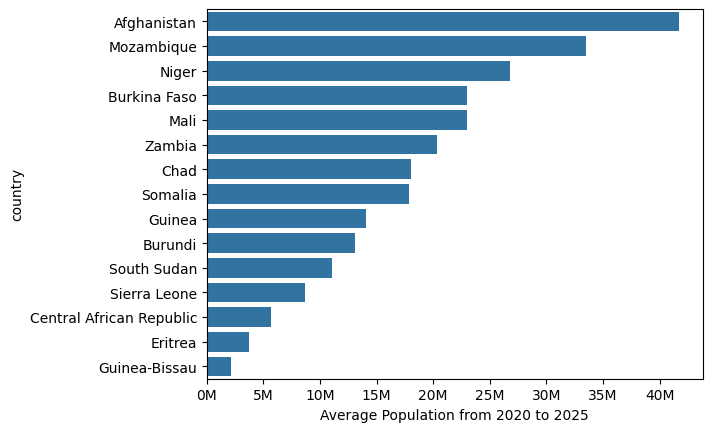

In [51]:
df_sorted_avg_p = merged_avg_df.sort_values('p_avg_2020_to_2025', ascending=False)
ax=sns.barplot(x='p_avg_2020_to_2025', y=df_sorted_avg_p.index, data=df_sorted_avg_p)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
plt.xlabel("Average Population from 2020 to 2025");

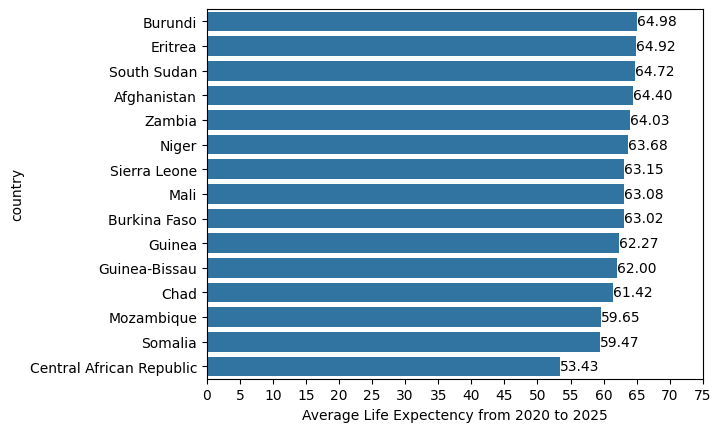

In [52]:
df_sorted_avg_le = merged_avg_df.sort_values('le_avg_2020_to_2025', ascending=False)
ax= sns.barplot(x='le_avg_2020_to_2025', y=df_sorted_avg_le.index, data=df_sorted_avg_le)
plt.xticks(range(0,76,5))
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")
plt.xlabel("Average Life Expectency from 2020 to 2025");

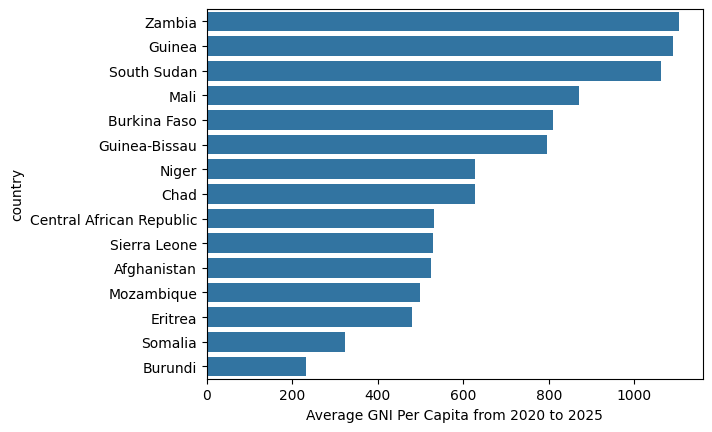

In [53]:
df_sorted_avg_GNI = merged_avg_df.sort_values('gni_avg_2020_to_2025', ascending=False)
ax= sns.barplot(x='gni_avg_2020_to_2025', y=df_sorted_avg_GNI.index, data=df_sorted_avg_GNI)
plt.xlabel("Average GNI Per Capita from 2020 to 2025");

#### To analyze the results of the joined table, we are going to normalize the 3 factors we are considering: GNI per capita, Population and Life Expectency to create a score for each (from 0 to 1). The higher the score, the higher the priority for that country. We considered all factors to have the same weight and took the average.

In [54]:
merged_avg_df['PopNorm'] = (merged_avg_df['p_avg_2020_to_2025'] - merged_avg_df['p_avg_2020_to_2025'].min()) / (merged_avg_df['p_avg_2020_to_2025'].max() - merged_avg_df['p_avg_2020_to_2025'].min()) #Normalization for the avg population

merged_avg_df['GNINorm'] = 1 - (merged_avg_df['gni_avg_2020_to_2025'] - merged_avg_df['gni_avg_2020_to_2025'].min()) / (merged_avg_df['gni_avg_2020_to_2025'].max() - merged_avg_df['gni_avg_2020_to_2025'].min()) #Normalization for the avg GNI

merged_avg_df['LifeExpecNorm'] = 1 - (merged_avg_df['le_avg_2020_to_2025'] - merged_avg_df['le_avg_2020_to_2025'].min()) / (merged_avg_df['le_avg_2020_to_2025'].max() - merged_avg_df['le_avg_2020_to_2025'].min()) #Normalization for the avg Life Expectency

merged_avg_df['Score'] = (merged_avg_df['PopNorm'] + merged_avg_df['GNINorm'] + merged_avg_df['LifeExpecNorm']) / 3 #Taking the average of the 3 normalized values. We considered them all to have the same weight.

merged_avg_score_df=merged_avg_df.sort_values('Score', ascending=False).iloc[0:10].copy() # We limited the results to the top 10 countries for prioritization and sorted them by score from high to low
merged_avg_score_df

,gni_avg_2020_to_2025,le_avg_2020_to_2025,p_avg_2020_to_2025,PopNorm,GNINorm,LifeExpecNorm,Score
country,,,,,,,
Mozambique,498.50,59.65,33483333.33,0.79,0.69,0.46,0.65
Somalia,322.67,59.47,17883333.33,0.40,0.90,0.48,0.59
Central African Republic,532.00,53.43,5690000.00,0.09,0.66,1.00,0.58
Afghanistan,524.17,64.40,41716666.67,1.00,0.67,0.05,0.57
Niger,627.17,63.68,26750000.00,0.62,0.55,0.11,0.43
Burundi,232.00,64.98,13066666.67,0.28,1.00,0.00,0.43
Chad,627.00,61.42,18000000.00,0.40,0.55,0.31,0.42
Burkina Faso,810.83,63.02,22966666.67,0.53,0.34,0.17,0.34
Sierra Leone,530.00,63.15,8700000.00,0.17,0.66,0.16,0.33


#### Based on the Score, the top 10 countries that require healthcare (from highest to lowest) are: Mozambique, Somalia, Central African Republic, Afghanistan, Niger, Burundi, Chad, Burkina Faso, Sierra Leone and Mali

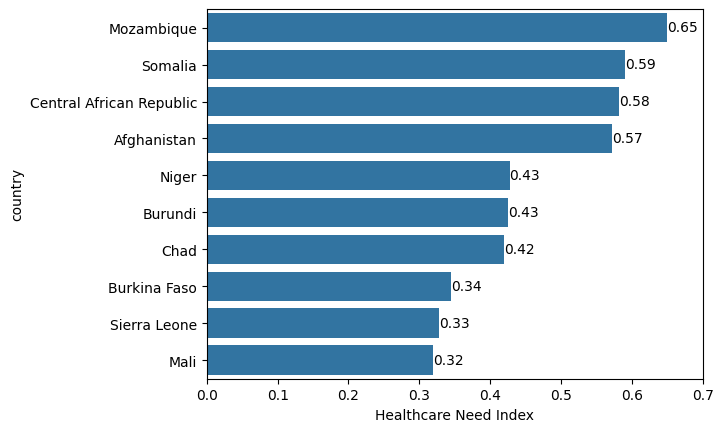

In [55]:
df_sorted = merged_avg_score_df.sort_values('Score', ascending=False)
ax=sns.barplot(x='Score', y=df_sorted.index, data=df_sorted)
plt.xticks([x/100 for x in range(0,80,10)])
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")
plt.xlabel("Healthcare Need Index");

---

## Summary
__Summarizing the key insights from the analysis__

- A Healthcare Need Index was calculated using Population, Life Expectancy, and GNI per capita to determine countries in dire need.

- The top three countries with the highest need score were identified as: Mozambique (0.65), Somalia (0.59), and Central African Republic (0.58)

## Recommendations/Conclusion

- Prioritize Aid: Direct immediate healthcare and welfare resources to the top-ranked countries, particularly Mozambique, Somalia, and CAR.

- Target Root Causes: Focus on implementing programs that directly improve Life Expectancy and increase GNI per capita, addressing the core systemic issues highlighted by the Index.

- Utilize Benchmark: The calculated Healthcare Need Index should be adopted as a quantitative measure to track and monitor the success and impact of all future health and development initiatives.

## Limitations

It is important to note that this project is not the most accurate representation of the countries in most need of healthcare due to the following:

1) The health index used is arbitrary and the weights of the averages are not based on scientific reasoning.
2) The data is limited to 3 databases only, while in reality there are many factors that could indicate the quality of healthcare such as the geopolitical climate and education
3) Time constraints and limited resources, which led to the aforemnetioned reasons